In [3]:
import pandas as pd
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

### Notes

Features are: TV, Radio, Newspaper Response is Sales

We want to predict sales based on advertising dollars

Because response variable is continous, this is a regression problem

There are 200 observation and each observation is a single market



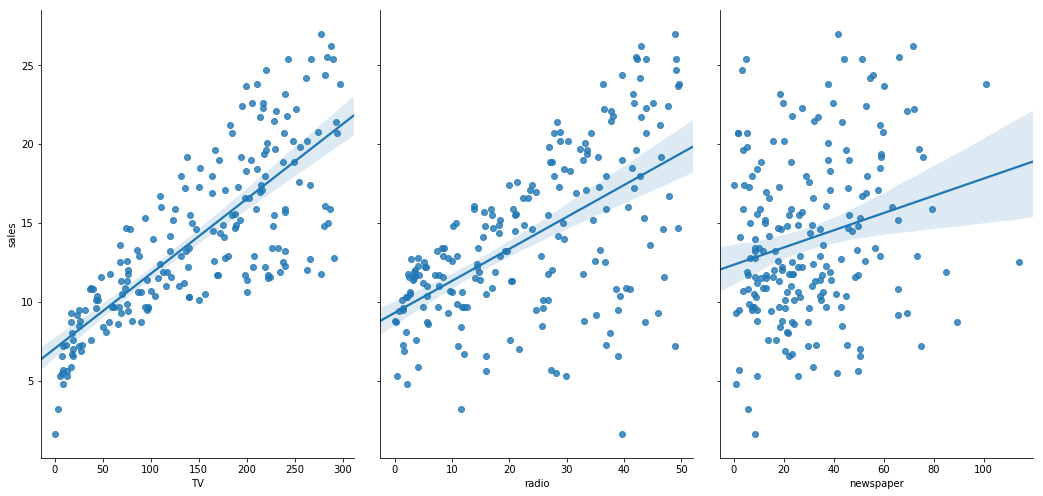

In [16]:
import seaborn as sns

%matplotlib inline

# visualize the relationship between the features and response using scatter plots
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')

Y = B0 + B1*TV + B2*Radio + B3*Newspaper

B values are model coefficients. These values are learned during the model fitting step using the "least squares" criterion. The fitted model can then make predictions. B0 is the intercept.

Linear regression finds the line that best fits the observed data. It describes the best line as the one that minizmizes the sum of square errors which is the sum of the squared vertical distances between each point and the line. This line of best fit can then make predictions.

In [18]:
# create python list of feature columns

feature_cols = ['TV', 'radio', 'newspaper']

# use list to select subset of original dataframe
# setting feature 
X = df[feature_cols]

X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [22]:
# setting response (a pandas series which is still a numpy array)
y = df.sales

y.head()


1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

## Splitting X and y into training and testing sets

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Linear Regression in Sckitlearn

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpreting Model Coefficients

In [32]:
# print the intercepts
print(lin_reg.intercept_)
print(lin_reg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [33]:
# pair the feature names with coefficients
zip(feature_cols, lin_reg.coef_)

y = 2.88 + 0.0466TV + 0.179Radio + 0.00345Newspaper


Interpretation: 

For a given amount of Radio and Newspaper ad spending, a unit increase in TV ad spending is assosciated with a 0.0466 "unit" increase in Sales.

Or more clearly : For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is assosciated with an increase in sales of 46.6 items.

### Making Predictions

In [34]:
# Make prediction on the testing set
y_pred = lin_reg.predict(X_test)

## Model evaluation metrics for regression

Evaluation metrics for clasification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continous values.


In [41]:
# example data for evaluation metrics

true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

# Mean Absolute Error is the mean of the absolute value of the errors
# Calculating MAE by hand 

print((10 + 0 + 20 + 10)/4)

# calculate MAE using sckit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))



10.0
10.0


In [45]:
# Mean Squared Error (MSE) is the mean of squared errors
# calaculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# calculate MSE using Sckit-learn
print(metrics.mean_squared_error(true, pred))


150.0
150.0


In [48]:
# Root mean squared Error is the squareroot of the squared roots
# Calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

# calculate RMSE using sckit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))


12.24744871391589
12.24744871391589


### Computing the RMSE for our Sales Predictions



In [49]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


### Feature Selection

In [51]:
# removing newspapers

feature_cols = ['TV', 'radio']

# use list to select subset of original dataframe
# setting feature 
X = df[feature_cols]

# setting response (a pandas series which is still a numpy array)
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.3879034699382886
